In [100]:
#setup
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

In [101]:
df = pd.read_feather('../databases/recursos.feather')
df = df.set_index('ano')

def config(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)

# Reservas/Recursos
Vamos começar plotando diretamente os dados de cada recurso/reserva:

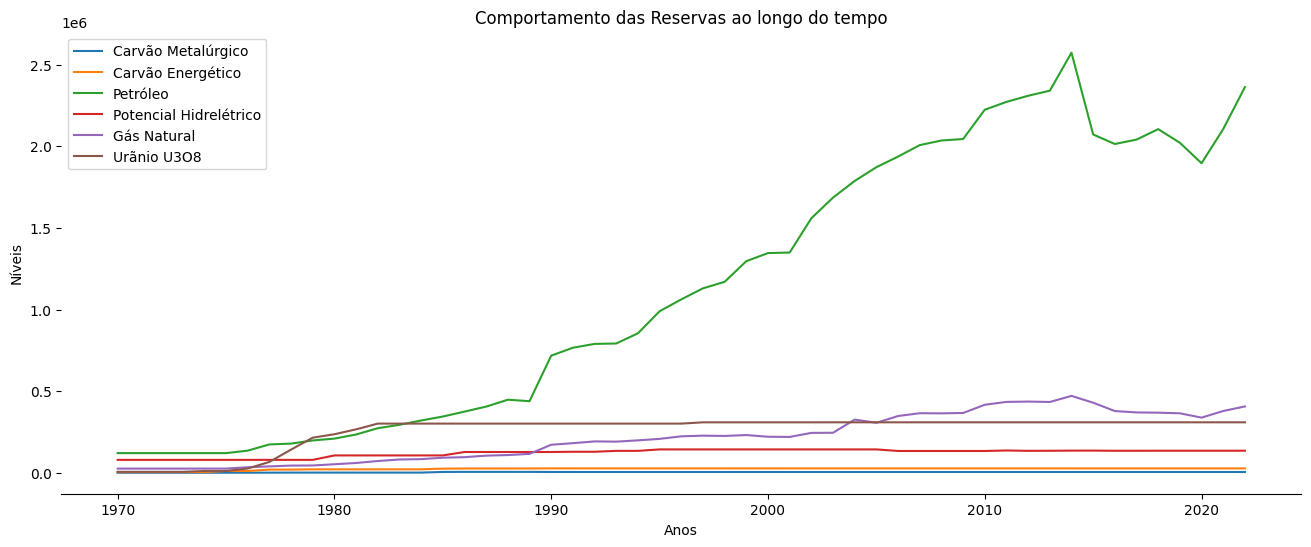

In [102]:
df_energia = df[['carvão_metalúrgico', 'carvão_energético','petróleo', 'hidraulico_total_mw', 'gás_natural', 'uranio_u3o8']]

ax = df_energia.plot(title="Comportamento das Reservas ao longo do tempo", xlabel="Anos", ylabel="Níveis", figsize=(16,6))
config(ax)
ax.legend(['Carvão Metalúrgico', 'Carvão Energético', 'Petróleo', 'Potencial Hidrelétrico', 'Gás Natural', 'Urãnio U3O8'])

Percebe-se claramente a escala do petróleo, o Brasil é um país com reservas abundantes, a partir de 1990, com a exploração da bacia de campos e em 2006 com a descoberta do pré-sal, as reservas de petróleo aumentam significativamente. Em meados de 1973/1980, com a crise do petróleo, ao buscar alternativas, o governo investe na exploração de urânio, explicando esse aumento rápido seguido de uma estabilidade que dura até hoje. Gás natural segue uma curva consistente. O potencial hidrelétrico segue aumentando à pequenos passos apesar de ser a principal fonte de energia brasileira atualmente

# Mudanças Percentuais ao Longo do tempo
Visualizar as mudanças percentuais dos recursos vai nos ajudar a encontrar picos de produção, a entender melhor o comportamento ao longo do tempo, também encontrará recursos estagnados/estáveis.

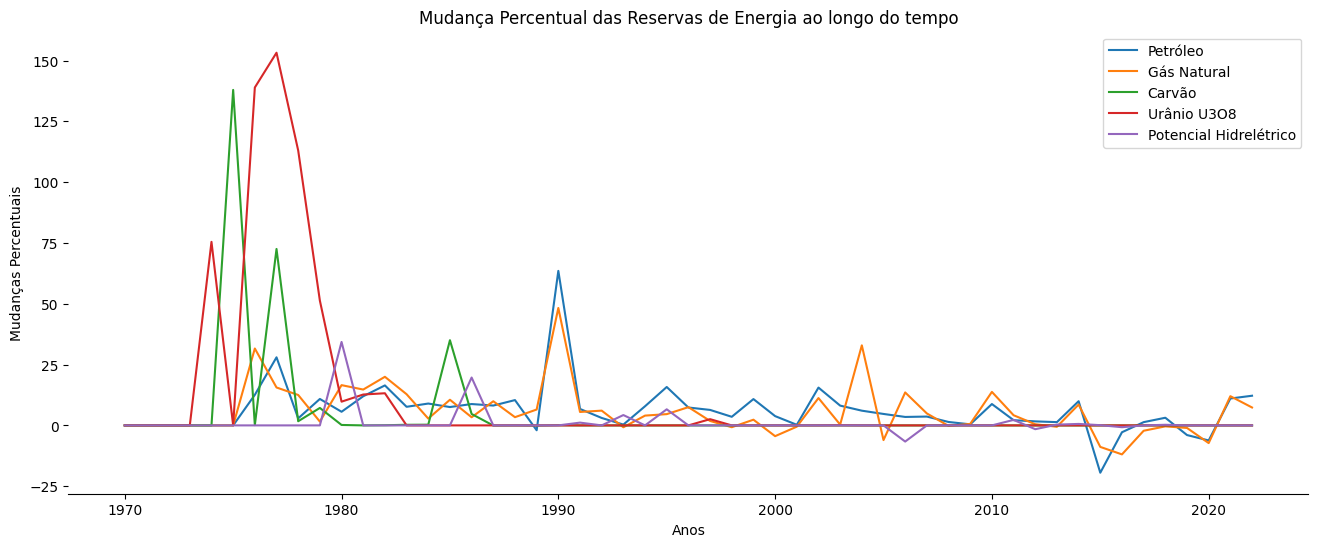

In [103]:
colunas_mudança_perct = df.columns[df.columns.str.endswith('mudança_perct')]
ax = df[colunas_mudança_perct].plot(title="Mudança Percentual das Reservas de Energia ao longo do tempo",
                               figsize=(16,6),
                               ylabel="Mudanças Percentuais",
                               xlabel = "Anos"
                               )
config(ax)                        
ax.legend(['Petróleo', 'Gás Natural', 'Carvão', 'Urânio U3O8', 'Potencial Hidrelétrico'])

Logo de cara se vê o "boom" no urânio e no carvão nos anos 1970-1980, seguidos de uma rápida estabilização, Isso se deve à crise do petróleo, como previamente dito, onde o Governo estava em busca de novas fontes de energia, e destinou grandes investimentos à prospecção, pesquisa, desenvolvimento de métodos e técnicas de trabalho e lavra de jazidas de urânio, também passou a buscar mais o carvão (metalúrgico).

A energia hidráulica é uma das principais fontes de energia do país, e se mantém estável durante esse período, possui definitivamente menos oscilações do que petróleo e gás natural, que andam numa trajetória muito semelhante 

# Consumo
Vamos plotar os dados do consumo total de cada recurso energético.

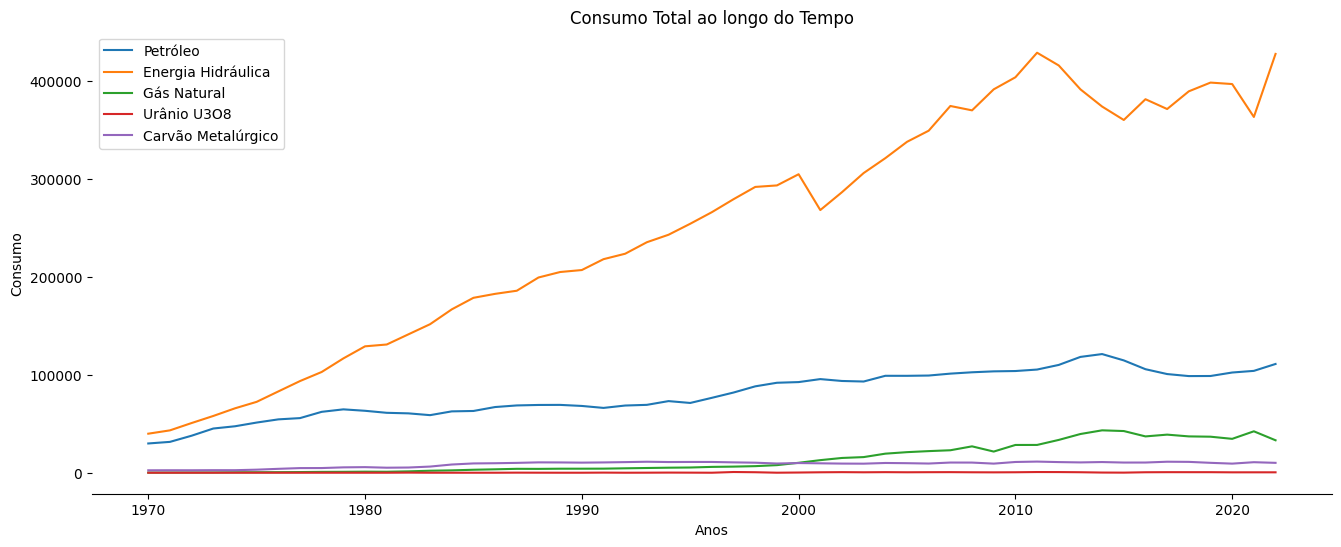

In [104]:
colunas_consumo_total = df.columns[df.columns.str.startswith('consumo_total')]
df_consumo = df[colunas_consumo_total]

ax = df.plot(y=colunas_consumo_total, 
            figsize=(16,6), 
            title="Consumo Total ao longo do Tempo",
            xlabel="Anos",
            ylabel="Consumo")
    
config(ax)
ax.legend(['Petróleo', 'Energia Hidráulica', 'Gás Natural', 'Urânio U3O8', 'Carvão Metalúrgico'])

No brasil, a fonte de energia mais utilizada é a hidrelética, e isso se vê claramente pela escalada do consumo da energia hidrelétrica, o consumo de energia vinda de derivados de petróleo se mantém estável com um leve aumento em meados de 2005. O mais curioso é o comportamento do gás natural, que somente a partir dos anos 2000 viu seu consumo aumentar, se apresentando como alternativa. Urânio e Carvão se mantém estáveis, com baixo consumo final.

# Produção
Vamos plotar os dados de produção de cada recurso.

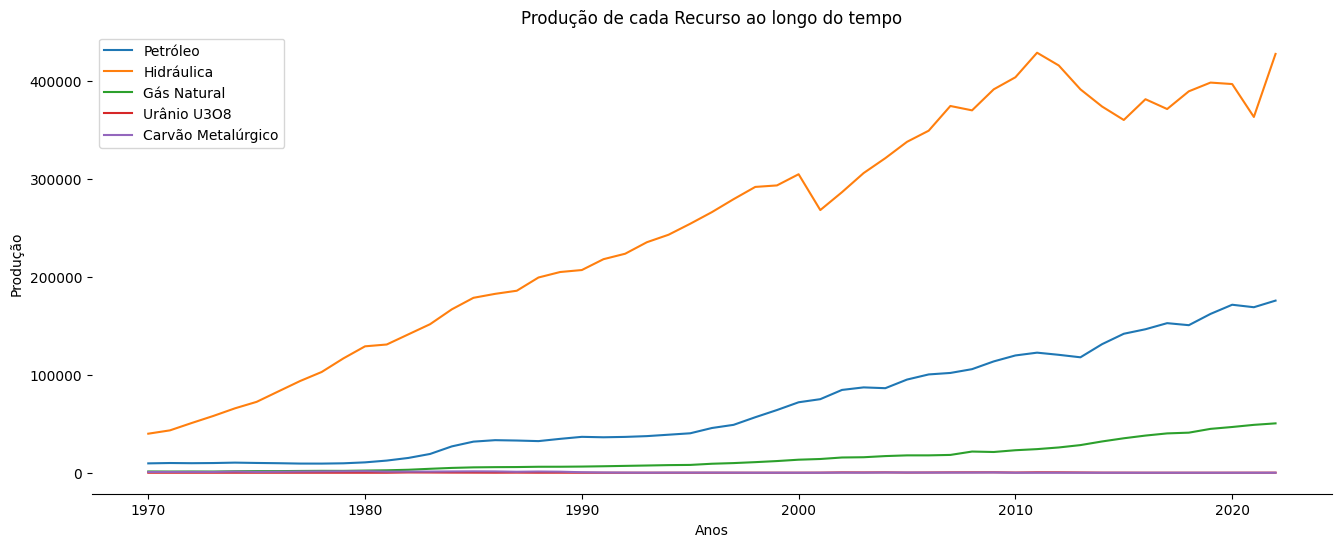

In [105]:
colunas_produção = df.columns[df.columns.str.startswith('produção')]
df_produção = df[colunas_produção]

ax = df_produção.plot(title="Produção de cada Recurso ao longo do tempo", xlabel="Anos", ylabel="Produção", figsize=(16,6))
config(ax)
ax.legend(['Petróleo', 'Hidráulica', 'Gás Natural', 'Urânio U3O8', 'Carvão Metalúrgico'])
    

Percebe-se que a produção e o potencial hidrelétrico seguem uma curva idêntica, ou seja, 100% da energia hidrelétrica é consumida, estabelecendo uma relação (muito) linear entre essas variáveis. petróleo e gás seguem um padrão muito parecido. Nota-se que a curva de produção do petróleo é ligeiramente mais íngrime que a de consumo.

# Relação entre o nível das reservas e a produção de energia
Vamos visualizar a relação entre os níveis das reservas e a produção de energia, o que pode ser uma informação importante.

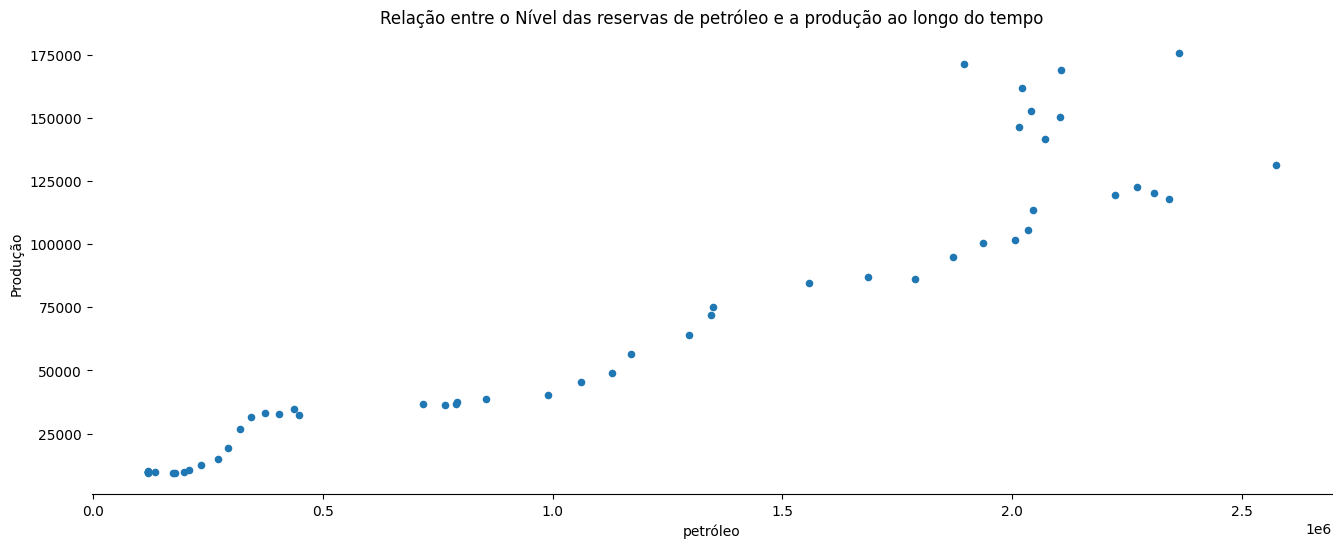

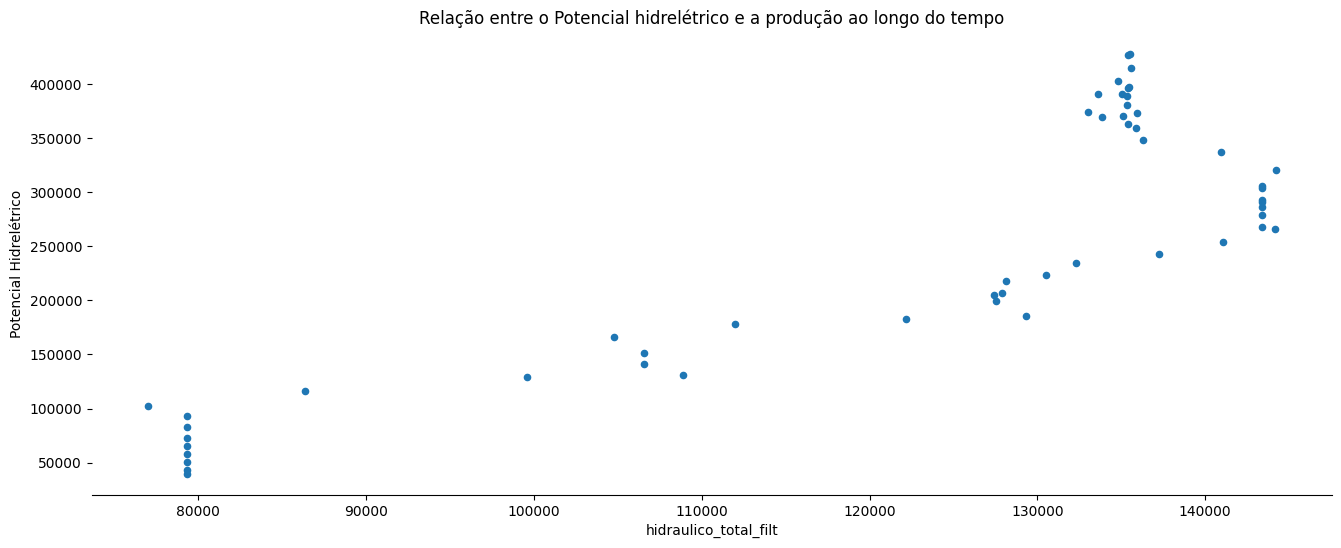

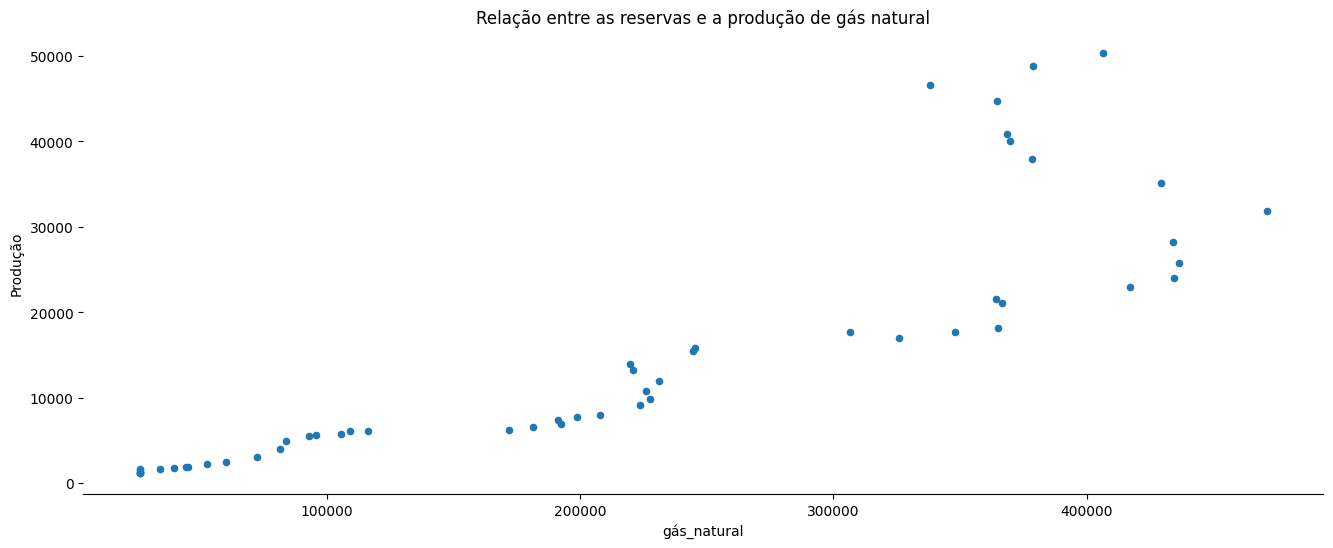

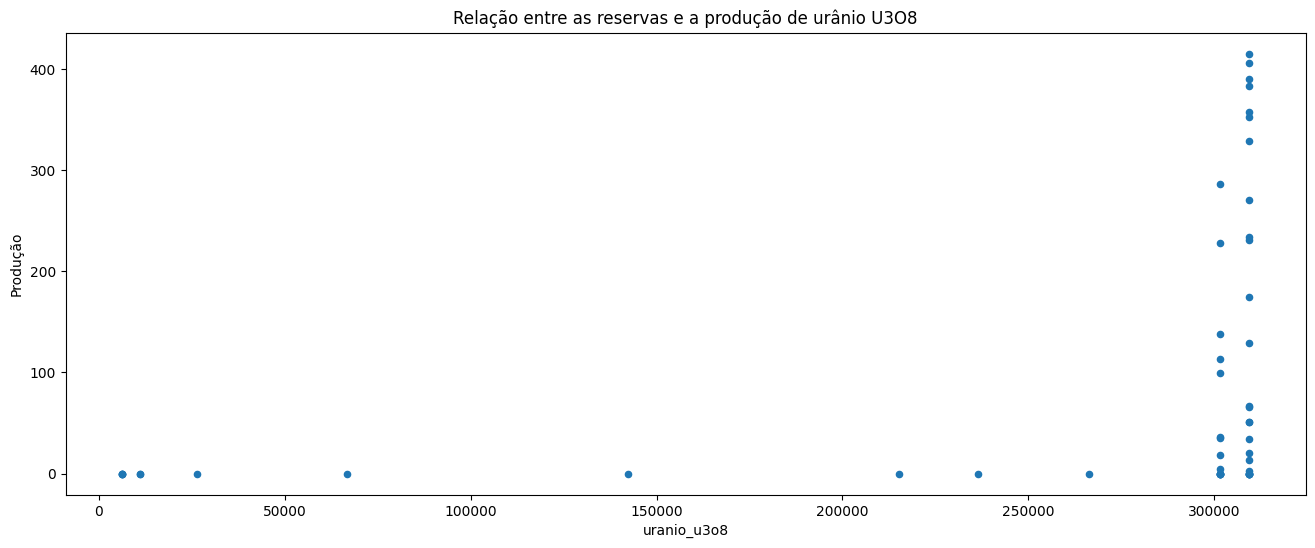

In [106]:
from scipy.signal import savgol_filter

ax = df.plot(x='petróleo', 
             y='produção_petróleo',
             kind='scatter', 
             figsize=(16,6),
             title="Relação entre o Nível das reservas de petróleo e a produção ao longo do tempo",
             ylabel="Produção"
             )
config(ax)

# Aplicamos um filtro para suavizar a curva de potencial hidrelétrico
#     # porque ela apresenta muitos picos bruscos, o que pode dificultar a visualização
#     # do relacionamento entre as duas variáveis, podemos preservar o máximo de informação
#     # possível e visualizar com mais clareza após a filtragem.
df['hidraulico_total_filt'] = savgol_filter(df['hidraulico_total_mw'], 5, 2)
ax = df.plot(x='hidraulico_total_filt',
             y='produção_hidraulica', 
             kind='scatter', 
             figsize=(16,6),
             title="Relação entre o Potencial hidrelétrico e a produção ao longo do tempo",
             ylabel="Potencial Hidrelétrico"
             )
config(ax)

ax = df.plot(
    x="gás_natural",
    y='produção_gas_natural',
    title="Relação entre as reservas e a produção de gás natural",
    figsize=(16,6),
    ylabel="Produção",
    kind='scatter'
)
config(ax)

ax = df.plot(
    x='uranio_u3o8',
    y="produção_uranio_u3o8",
    ylabel="Produção",
    figsize=(16,6),
    title="Relação entre as reservas e a produção de urânio U3O8",
    kind='scatter'
)

É possível notar a linearidade da relação entre as reservas/recursos e a produção de: petróleo, gás, e do potencial hidrelétrico, como são as mais utilizadas, quanto mais disponível, mais se produz. Já no caso do carvão, a relação é um pouco mais complexa. Já no caso do urânio, houve um aumento drástico, causado pelos acontecimentos de 1970-1980.

# Relação Reservas/Consumo
Vamos fazer uma análise semelhante, desta vez com o consumo total de cada tipo de energia.

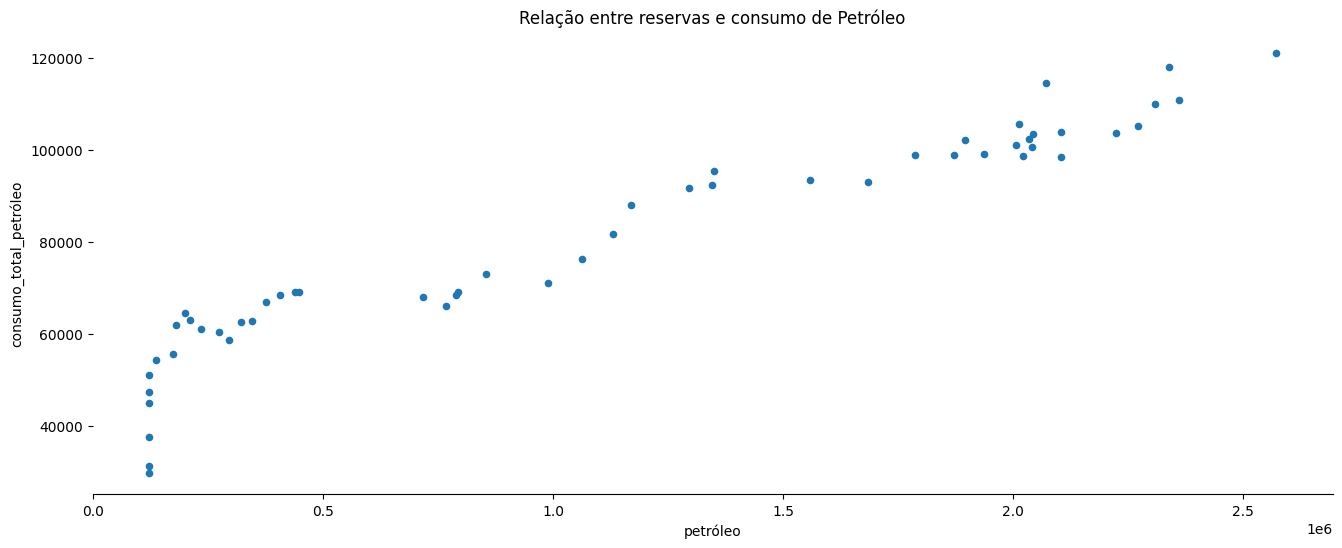

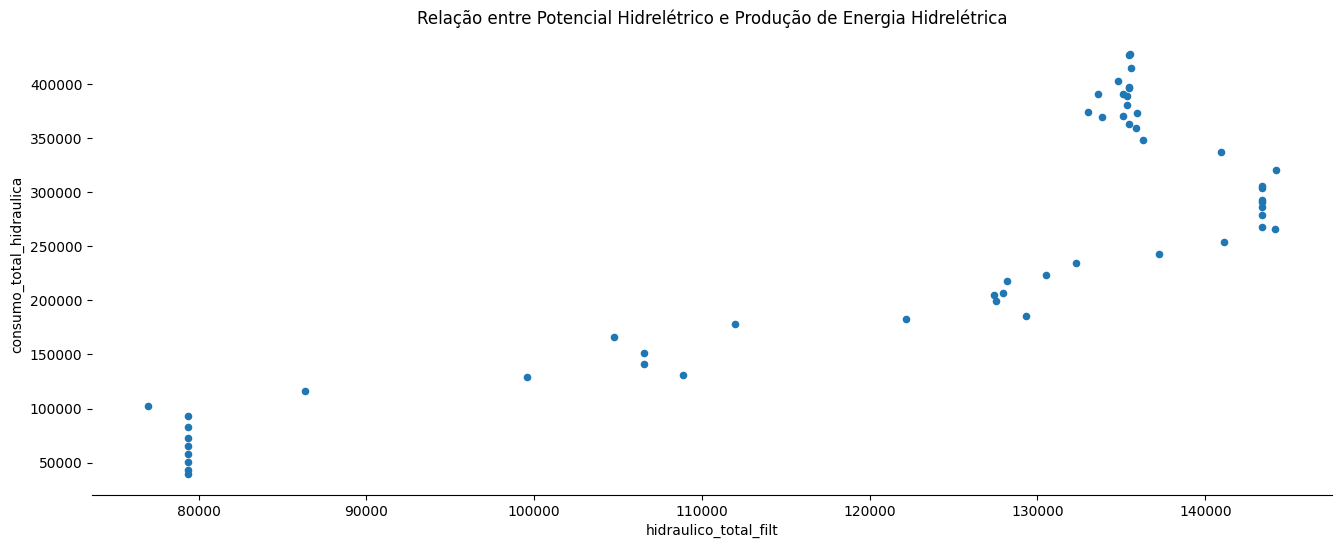

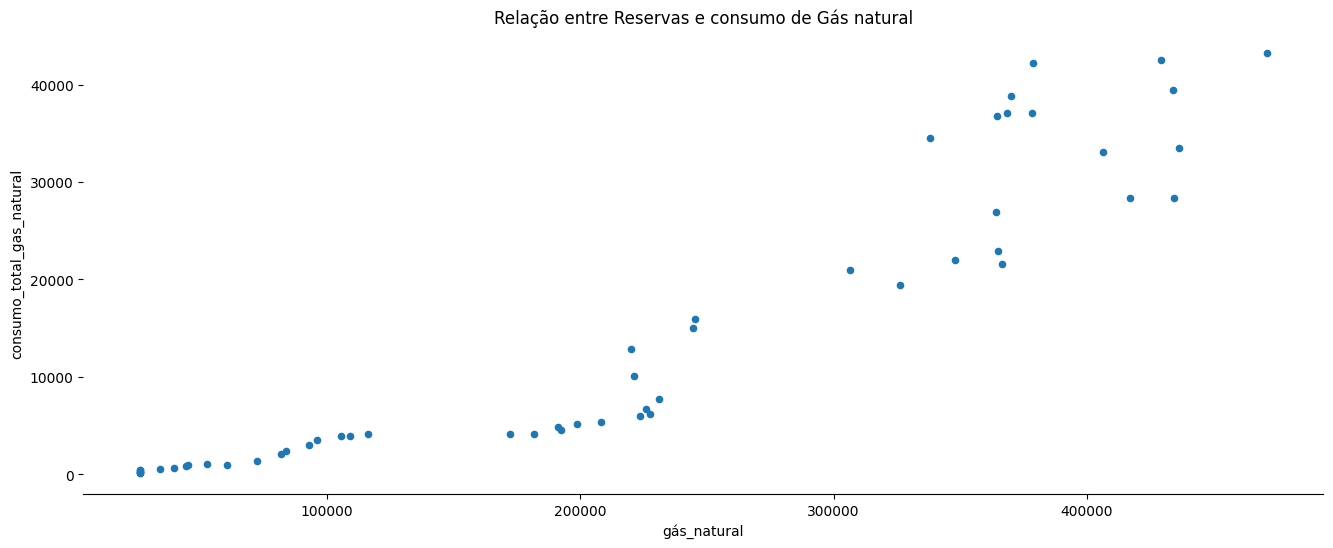

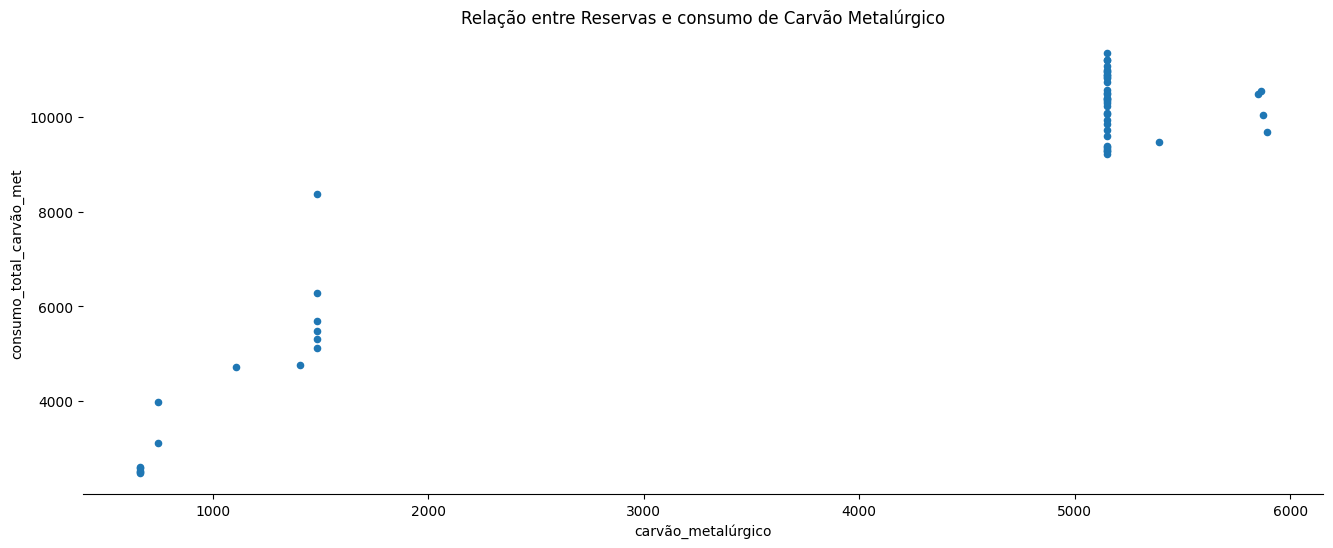

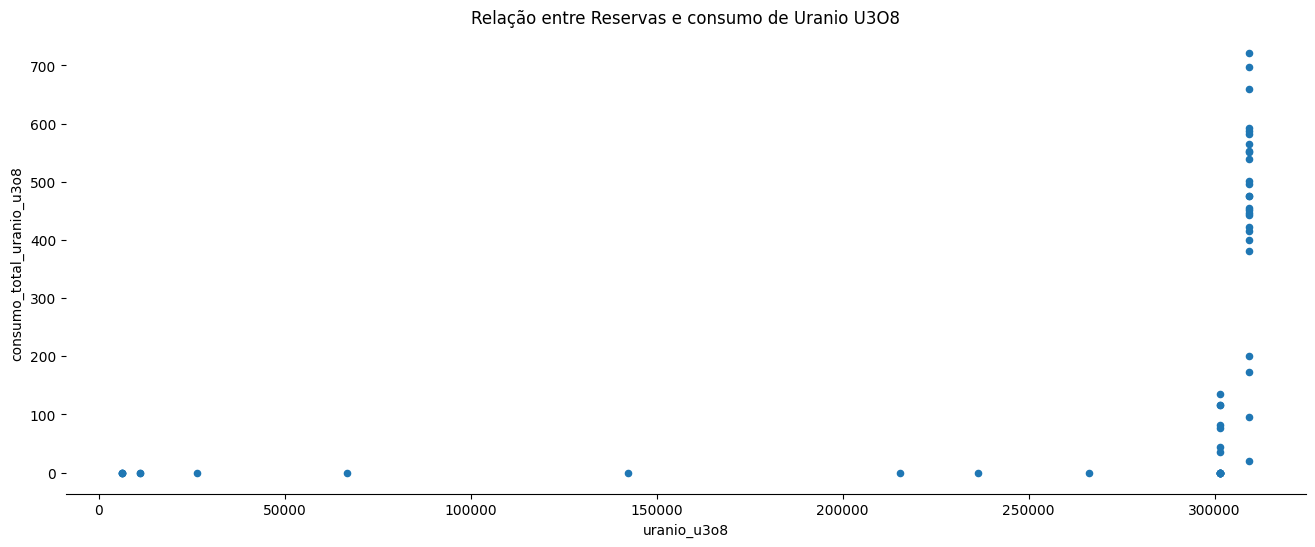

In [109]:
ax = df.plot(
    title="Relação entre reservas e consumo de Petróleo",
    x='petróleo',
    y='consumo_total_petróleo', 
    figsize=(16,6),
    kind="scatter")
config(ax)

ax = df.plot(
    title="Relação entre Potencial Hidrelétrico e Produção de Energia Hidrelétrica" ,
    x='hidraulico_total_filt',
    y='consumo_total_hidraulica',
    figsize=(16,6),
    kind="scatter")
config(ax)

ax = df.plot(
    title="Relação entre Reservas e consumo de Gás natural",
    x='gás_natural',
    y='consumo_total_gas_natural', 
    figsize=(16,6), 
    kind="scatter")
config(ax)

ax = df.plot(
    title="Relação entre Reservas e consumo de Carvão Metalúrgico",
    x='carvão_metalúrgico', 
    y='consumo_total_carvão_met', 
    figsize=(16,6), 
    kind="scatter")
config(ax)

ax = df.plot(
    title="Relação entre Reservas e consumo de Uranio U3O8",
    x='uranio_u3o8',
    y='consumo_total_uranio_u3o8', 
    figsize=(16,6), 
    kind="scatter")
config(ax)

Como esperado, petróleo, gás e p.hidrelétrico continuam com relações linares, porém, carvão metalúrgico desta vez apresentou uma certa linearidade, e o urânio continuou no mesmo padrão de comportamento

# Relação entre Importação e o Nível das reservas 

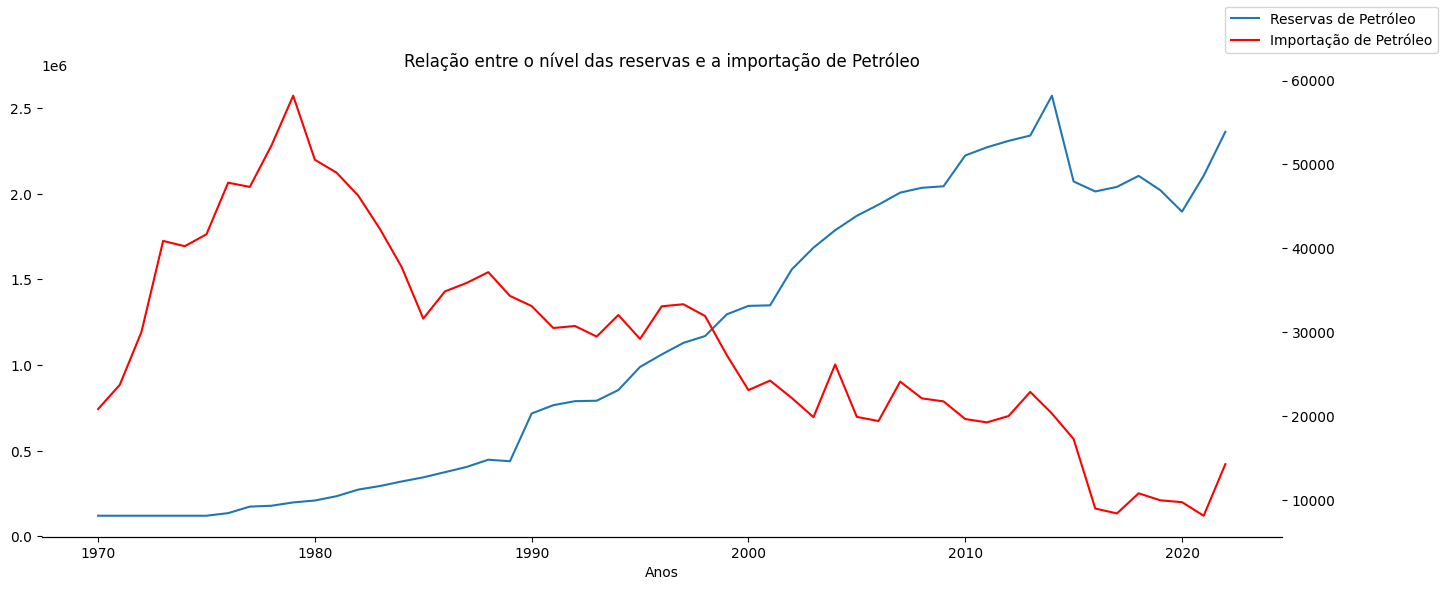

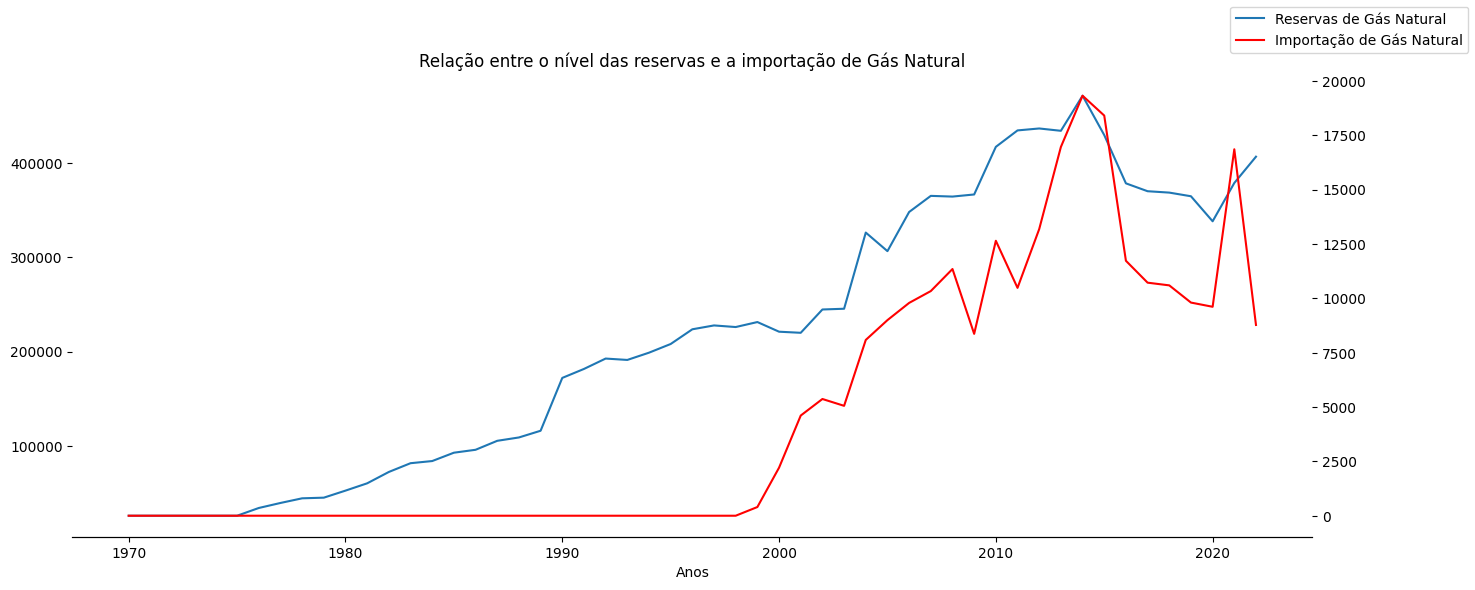

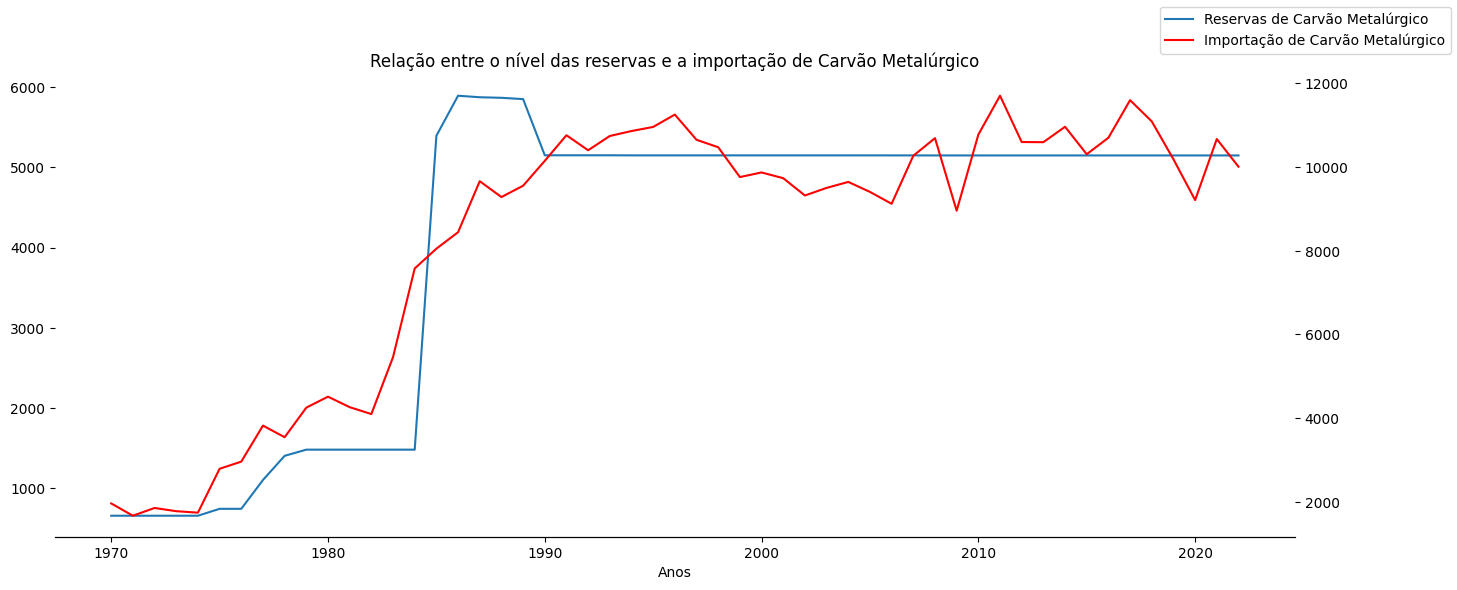

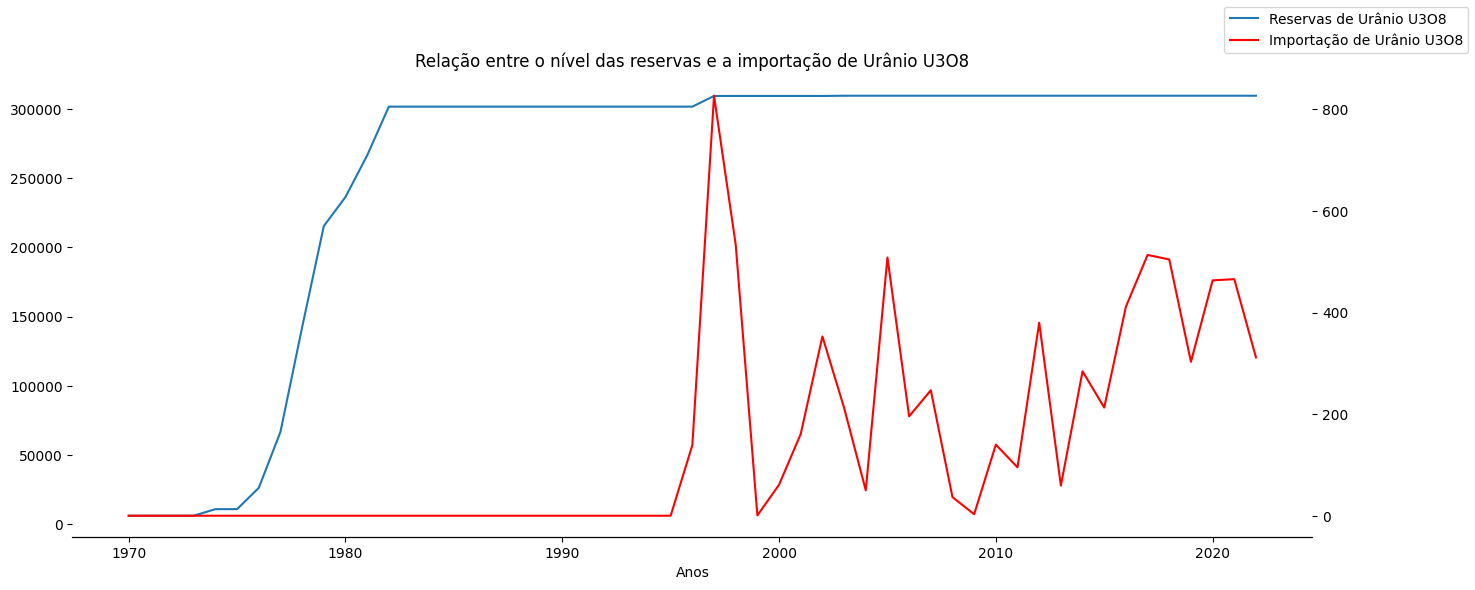

In [131]:
plot_infos = [
    {
        'y1': 'petróleo',
        'y2': 'importação_petróleo',
        'title': 'Relação entre o nível das reservas e a importação de Petróleo',
        'legend': ['Reservas de Petróleo', 'Importação de Petróleo']
    },
    {
        'y1': 'gás_natural',
        'y2': 'importação_gas_natural',
        'title': 'Relação entre o nível das reservas e a importação de Gás Natural',
        'legend': ['Reservas de Gás Natural', 'Importação de Gás Natural']
    },
    {
        'y1': 'carvão_metalúrgico',
        'y2': 'importação_carvão_met',
        'title': 'Relação entre o nível das reservas e a importação de Carvão Metalúrgico',
        'legend': ['Reservas de Carvão Metalúrgico', 'Importação de Carvão Metalúrgico']
    },
    {
        'y1': 'uranio_u3o8',
        'y2': 'importação_uranio_u3o8',
        'title': 'Relação entre o nível das reservas e a importação de Urânio U3O8',
        'legend': ['Reservas de Urânio U3O8', 'Importação de Urânio U3O8']
    },
]

for info in plot_infos:
    ax = df.plot(xlabel="Anos", y=info['y1'], legend=False, figsize=(16,6), title=info['title'])
    ax2 = ax.twinx()
    df.plot(y=info['y2'], figsize=(16,6), ax=ax2, legend=False, color="r")
    ax.figure.legend(info['legend'])
    config(ax2)
    config(ax)
